# Heart

#### The goal of the project is to predict the presence of heart disease in the patient

In [3]:
# import all the necessary libraries
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load the dataset - HEART.csv
df = pd.read_csv(r'heart.csv')

In [6]:
# View Data (first five rows of the data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#target
# 1- have heat disease
# 0 - does not have heart disease

In [8]:
# Bottom five rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
# The columns (age, sex, cp, trestbps,...) are features
# Each rows represent "Patient"

#### The features in the dataset and meaning:

age - age in years,

sex - (1 = male; 0 = female),

cp - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),

trestbps - resting blood pressure (in mm Hg on admission to the hospital),

chol - serum cholestoral in mg/dl,

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),

restecg - resting electrocardiographic results,

thalach - maximum heart rate achieved,

exang - exercise induced angina (1 = yes; 0 = no),

oldpeak - ST depression induced by exercise relative to rest,

slope - the slope of the peak exercise ST segment,

ca - number of major vessels (0-3) colored by flourosopy,

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,

target - have disease or not (1=yes, 0=no).


In [12]:
# Rename the column header
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestrol', 
             'fasting_blood_sugar', 'rest_ecg', 'max_heart', 'exercise_induced_angina',
             'st_depression', 'st_slope', 'no_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
# Data verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain               303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholestrol               303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart                303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  no_major_vessels         303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [16]:
# Statistcal Analysis of the data
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

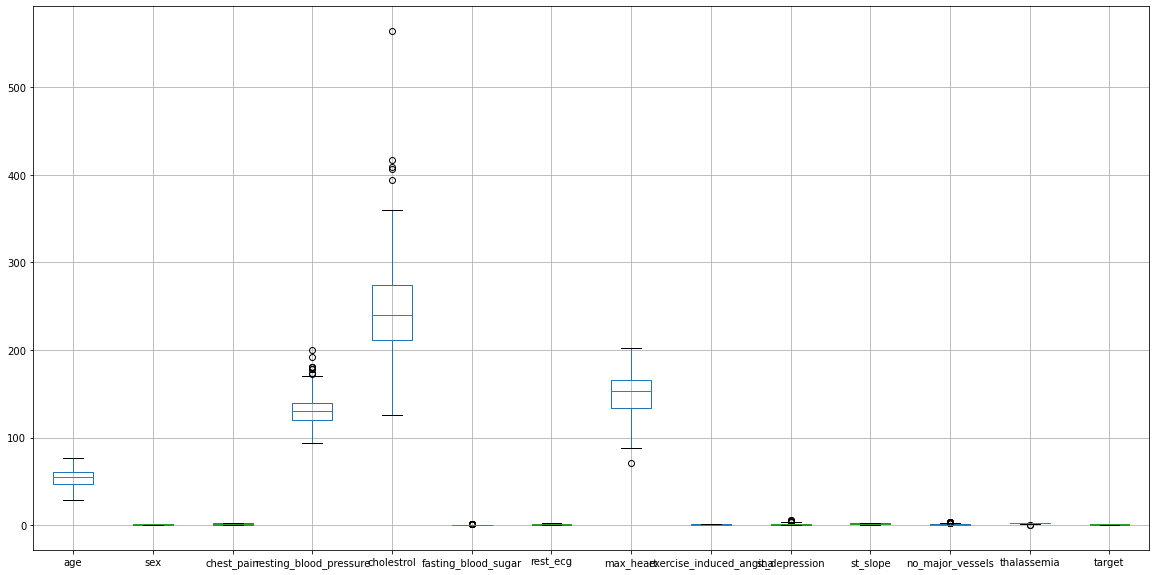

In [82]:
# Outlier detection
# When your mean is not equal to the median
df.boxplot(figsize = (20, 10))

In [23]:
# Missing values
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        age    sex  chest_pain  resting_blood_pressure  cholestrol  \
0    False  False       False                   False       False   
1    False  False       False                   False       False   
2    False  False       False                   False       False   
3    False  False       False                   False       False   
4    False  False       False                   False       False   
..     ...    ...         ...                     ...         ...   
298  False  False       False                   False       False   
299  False  False       False                   False       False   
300  False  False       False                   False       False   
301  False  False       False                   False       False   
302  False  False       False                   False       False   

     fasting_blood_sugar  rest_ecg  max_heart  exercise_induced_angina  \
0                  False     False 

In [25]:
# Missing values 2
df.isnull().sum()

age                        0
sex                        0
chest_pain                 0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_sugar        0
rest_ecg                   0
max_heart                  0
exercise_induced_angina    0
st_depression              0
st_slope                   0
no_major_vessels           0
thalassemia                0
target                     0
dtype: int64

<AxesSubplot:title={'center':'Visualizing missing values in the data set'}>

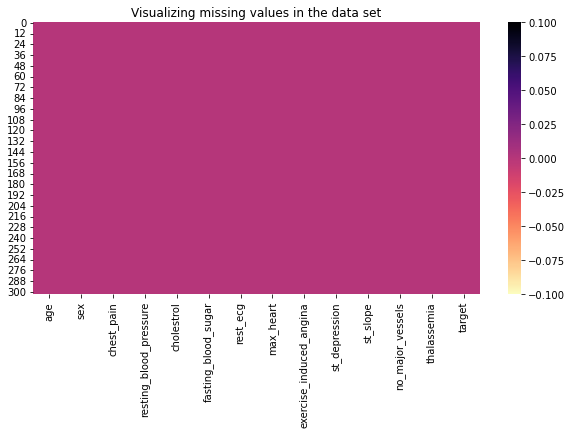

In [29]:
# Visualizing missing values
plt.figure(figsize = (10, 5))
plt.title('Visualizing missing values in the data set')
sns.heatmap(df.isnull(),  cbar = True, cmap = 'magma_r')


# Exploratory Data Analysis

In [30]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# Age
# max -29, min - 77, Group = 5 , (77 - 28) / 5 = 10
# Age range - (29 - 39, 40 - 50, 51 - 61, 62 - 72, 73 - 83)

In [33]:
# Create a function that categorises patient age
def age_bracket(age):
    if age <= 39:
        return 'Youth(29 - 39)'
    elif age <= 50:
        return 'Adult(40 - 50)'
    elif age <= 61:
        return 'Old Adult(51 - 61)'
    elif age <= 72:
        return 'Elders(62 - 72)'
    else:
        return 'Aged(> 72)'
    
# Create a new column for age category
df['age_group'] = df['age'].apply(age_bracket)

df.head()     

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Elders(62 - 72)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Youth(29 - 39)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(40 - 50)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(51 - 61)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(51 - 61)


Text(0, 0.5, 'Count of age group')

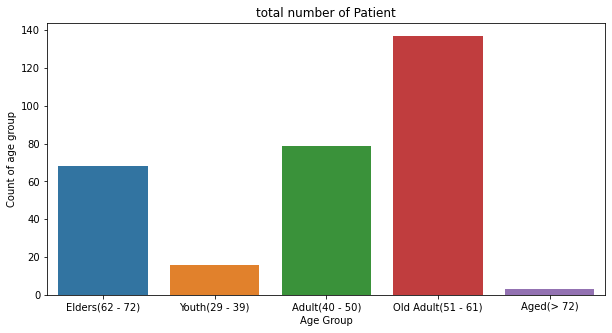

In [34]:
# Visualize patient age group
plt.figure(figsize = (10, 5))
sns.countplot(x = 'age_group', data = df )
plt.title('total number of Patient')
plt.xlabel('Age Group')
plt.ylabel('Count of age group')

In [44]:
# Sex (1 = Male, 0 = Female)

# Create a function that categorises Gender
def gender(sex):
    if sex == 1:
        return 'Male'
    else:
        return 'Female'

df['gender'] = df['sex'].apply(gender)

Text(0, 0.5, 'Count of patient gender')

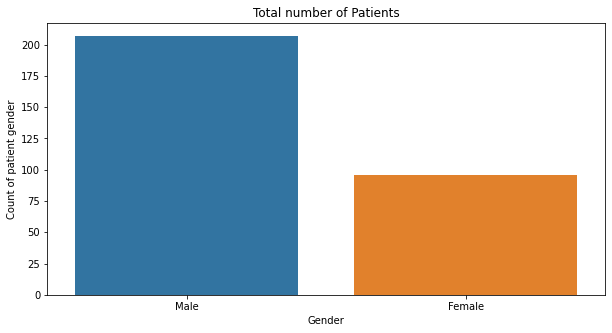

In [45]:
# Visualize patient age group
plt.figure(figsize = (10, 5))
sns.countplot(x = 'gender', data = df )
plt.title('Total number of Patients')
plt.xlabel('Gender')
plt.ylabel('Count of patient gender')

Text(0, 0.5, 'Count of age group')

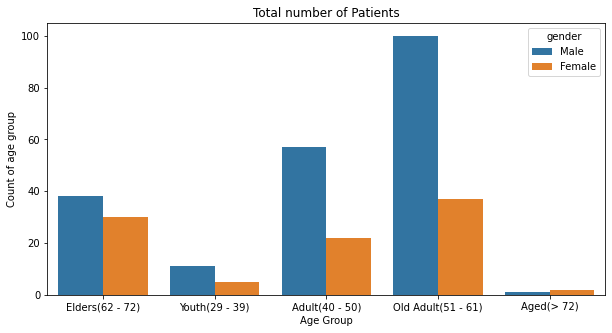

In [47]:
# Visualize patient gender and age group
plt.figure(figsize = (10, 5))
sns.countplot(x = 'age_group', data = df, hue = 'gender' )
plt.title('Total number of Patients')
plt.xlabel('Age Group')
plt.ylabel('Count of age group')

In [50]:
# chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

#  Create a funcfion that categorize chest pain

def pain_category(cp):
    if cp == 1:
        return 'typical angina'
    elif cp == 2:
        return 'atypical angina'
    elif cp == 3:
        return 'non-anginal pain'
    else:
        return 'asymptomatic'

# Create a new column and apply the function
df['chest_pain_category'] = df['chest_pain'].apply(pain_category)

In [51]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia,target,age_group,gender,chest_pain_category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Elders(62 - 72),Male,non-anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Youth(29 - 39),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(40 - 50),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(51 - 61),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(51 - 61),Female,asymptomatic


Text(0, 0.5, 'Count of chest pain')

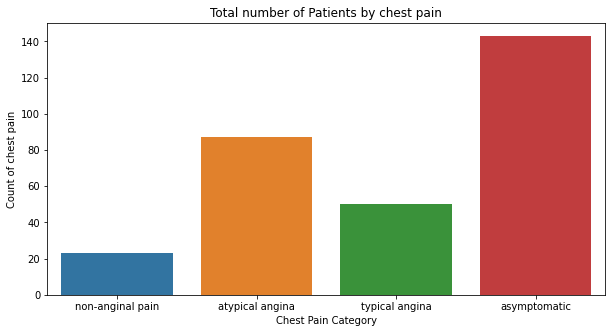

In [52]:
# Visualize patient chest pain category

plt.figure(figsize = (10, 5))
sns.countplot(x = 'chest_pain_category', data = df )
plt.title('Total number of Patients by chest pain')
plt.xlabel('Chest Pain Category')
plt.ylabel('Count of chest pain')

Text(0, 0.5, 'Count of chest pain')

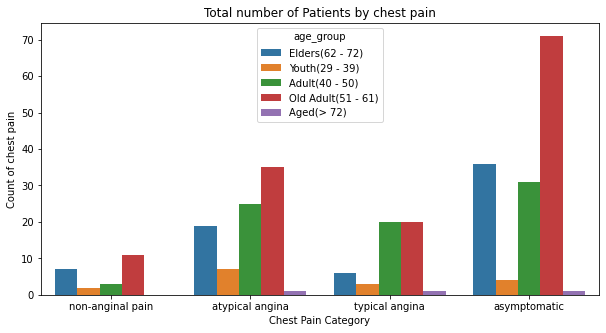

In [54]:
# Visualize patient chest pain by Gender

plt.figure(figsize = (10, 5))
sns.countplot(x = 'chest_pain_category', data = df, hue = 'age_group' )
plt.title('Total number of Patients by chest pain')
plt.xlabel('Chest Pain Category')
plt.ylabel('Count of chest pain')

In [110]:
# Thalassemia type (3 = normal; 6 = fixed defect; 7 = reversable defect,)

#  Create a funcfion that categorize chest pain
def Tha_Catg(tc):
    if tc == 3:
        return 'Normal'
    elif tc == 6:
        return 'Fixed defect'
    else:
        return 'Reversable defect'
# Create a new column called Thalassemia type
df['Thalassemia_Category'] = df['thalassemia'].apply(Tha_Catg)

In [113]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia,target,age_group,gender,chest_pain_category,Thalassemia_Category
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Elders(62 - 72),Male,non-anginal pain,Reversable defect
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Youth(29 - 39),Male,atypical angina,Reversable defect
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(40 - 50),Female,typical angina,Reversable defect
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(51 - 61),Male,typical angina,Reversable defect
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(51 - 61),Female,asymptomatic,Reversable defect


Text(0, 0.5, 'Count of Thalessemia')

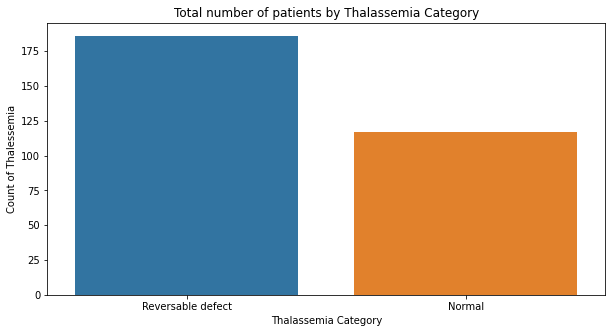

In [114]:
# Visualizing Thalassemia Category

plt.figure(figsize = (10, 5))
sns.countplot(x = 'Thalassemia_Category', data = df)
plt.title('Total number of patients by Thalassemia Category')
plt.xlabel('Thalassemia Category')
plt.ylabel('Count of Thalessemia')

Text(0, 0.5, 'Count of Thalessemia')

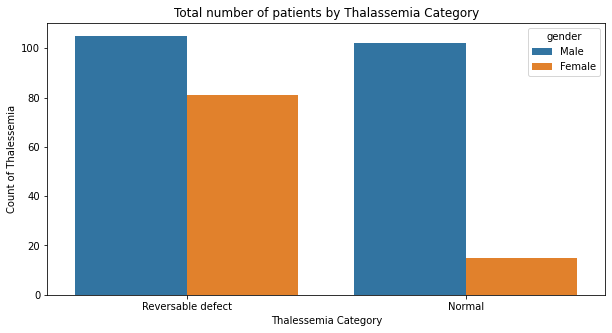

In [116]:
# Visualizing Thalessemia by Gender
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Thalassemia_Category', data = df, hue = 'gender')
plt.title('Total number of patients by Thalassemia Category')
plt.xlabel('Thalessemia Category')
plt.ylabel('Count of Thalessemia')

In [56]:
# Correlation Analysis
corel = df.corr()
corel

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

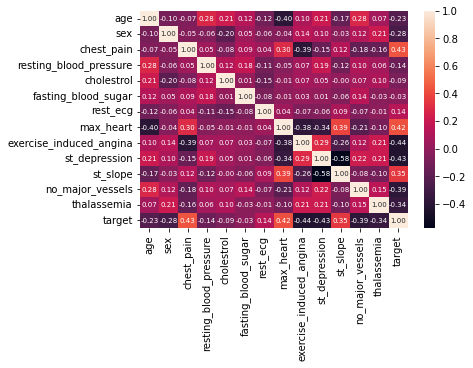

In [59]:
Corel = df.corr()

sns.heatmap(corel, cbar = True, annot = True, fmt = '.2f', annot_kws = {'size': 7})

In [62]:
# Machine Learning

from sklearn.model_selection import train_test_split

# ML Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# ML Metrics
from sklearn.metrics import accuracy_score

In [65]:
df.columns

Index(['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'no_major_vessels', 'thalassemia', 'target', 'age_group', 'gender',
       'chest_pain_category'],
      dtype='object')

In [72]:
#Data = x
x = df[['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'no_major_vessels', 'thalassemia']]
# Label = y
y = df[['target']]

In [73]:
data.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart,exercise_induced_angina,st_depression,st_slope,no_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [96]:
#label.head()

# Load three ML algorithms
classifiers = [[RandomForestClassifier(), 'Random Forest'], [KNeighborsClassifier(), 'K-Nearest Neighbors'], 
               [LogisticRegression(), 'Logistic Regression' ]]

In [104]:
# Train Test Split (Training on 80% of the dataset while Testing on 20%)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

accuracy_score_list = {}

for i in classifiers:
    model = i[0]
    model.fit(X_train, y_train)
    model_name = i[1]
    
    predict = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predict)
    
    accuracy_score_list[model_name] = ([str(round(accuracy * 100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

C:\Users\user\AppData\Local\Temp\ipykernel_9908\3966982768.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regress

In [105]:
print('Accuracy Score of ML Algorithms')
as_df = pd.DataFrame(accuracy_score_list)
as_df

Accuracy Score of ML Algorithms


,Random Forest,K-Nearest Neighbors,Logistic Regression
0,81.97%,72.13%,81.97%


In [106]:
y_test.head()

,target
116,1
121,1
1,1
81,1
56,1


In [107]:
predict

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1], dtype=int64)